In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [22]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_dict = pd.read_csv('train_data_dict.csv')
samp = pd.read_csv('sample_submission_lfbv3c3.csv')

In [23]:
train_df['grouped'] = train_df['Hospital_code'].astype(str) + train_df['Hospital_type_code'].astype(str) + train_df['City_Code_Hospital'].astype(str)+ train_df['Hospital_region_code'].astype(str) + train_df['Ward_Facility_Code'].astype(str)

test_df['grouped'] = test_df['Hospital_code'].astype(str) + test_df['Hospital_type_code'].astype(str) + test_df['City_Code_Hospital'].astype(str)+ test_df['Hospital_region_code'].astype(str) + test_df['Ward_Facility_Code'].astype(str)
test_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,grouped
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0,21c3ZA
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0,29a4XF
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0,26b2YD
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0,6a6XF
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0,28b11XF


In [24]:
train_df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
grouped                                 0
dtype: int64

In [25]:
x1=train_df['Bed Grade'].fillna(train_df['Bed Grade'].mode()[0])
x2=train_df['City_Code_Patient'].fillna(train_df['City_Code_Patient'].mode()[0])
train_df['Bed Grade'] = x1
train_df['City_Code_Patient'] =x2
train_df.isnull().sum()

x1=test_df['Bed Grade'].fillna(test_df['Bed Grade'].mode()[0])
x2=test_df['City_Code_Patient'].fillna(test_df['City_Code_Patient'].mode()[0])
test_df['Bed Grade'] = x1
test_df['City_Code_Patient'] =x2
test_df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
grouped                              0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
train_df['Hospital_type_code'] = le.fit_transform(train_df['Hospital_type_code'])
train_df['City_Code_Hospital'] = le.fit_transform(train_df['City_Code_Hospital'])
train_df['Hospital_region_code'] = le.fit_transform(train_df['Hospital_region_code'])
train_df['Department'] = le.fit_transform(train_df['Department'])
train_df['Ward_Type'] = le.fit_transform(train_df['Ward_Type'])
train_df['Ward_Facility_Code'] = le.fit_transform(train_df['Ward_Facility_Code'])
train_df['Type of Admission'] = le.fit_transform(train_df['Type of Admission'])
train_df['Severity of Illness'] = le.fit_transform(train_df['Severity of Illness'])
train_df['Age'] = le.fit_transform(train_df['Age'])
train_df['grouped'] = le.fit_transform(train_df['grouped'])
train_df['Stay'] = le1.fit_transform(train_df['Stay'])
train_df=train_df.drop('case_id',axis=1)
# train_df=train_df.drop('Admission_Deposit',axis=1)
# train_df=train_df.drop('Hospital_code',axis=1)
train_df=train_df.drop('patientid',axis=1)
# train_df=train_df.drop('Visitors with Patient',axis=1)
# train_df=train_df.drop('Hospital_code',axis=1)
# train_df=train_df.drop('Hospital_type_code',axis=1)
# train_df=train_df.drop('City_Code_Hospital',axis=1)
# train_df=train_df.drop('Hospital_region_code',axis=1)
# train_df=train_df.drop('Ward_Facility_Code',axis=1)

In [27]:

test_df['Hospital_type_code'] = le.fit_transform(test_df['Hospital_type_code'])
test_df['City_Code_Hospital'] = le.fit_transform(test_df['City_Code_Hospital'])
test_df['Hospital_region_code'] = le.fit_transform(test_df['Hospital_region_code'])
test_df['Department'] = le.fit_transform(test_df['Department'])
test_df['Ward_Type'] = le.fit_transform(test_df['Ward_Type'])
test_df['Ward_Facility_Code'] = le.fit_transform(test_df['Ward_Facility_Code'])
test_df['Type of Admission'] = le.fit_transform(test_df['Type of Admission'])
test_df['Severity of Illness'] = le.fit_transform(test_df['Severity of Illness'])
test_df['Age'] = le.fit_transform(test_df['Age'])
test_df['grouped'] = le.fit_transform(test_df['grouped'])
test_ids=test_df['case_id']
test_df=test_df.drop('case_id',axis=1)
# test_df=test_df.drop('Admission_Deposit',axis=1)
# test_df=test_df.drop('Hospital_code',axis=1)
test_df=test_df.drop('patientid',axis=1)
# test_df=test_df.drop('City_Code_Patient',axis=1)
# test_df=test_df.drop('Visitors with Patient',axis=1)
# test_df=test_df.drop('Hospital_code',axis=1)
# test_df=test_df.drop('Hospital_type_code',axis=1)
# test_df=test_df.drop('City_Code_Hospital',axis=1)
# test_df=test_df.drop('Hospital_region_code',axis=1)
# test_df=test_df.drop('Ward_Facility_Code',axis=1)

In [28]:
train_df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,grouped
0,8,2,2,2,3,3,2,5,2.0,7.0,0,0,2,5,4911.0,0,30
1,2,2,4,2,2,3,3,5,2.0,7.0,1,0,2,5,5954.0,4,21
2,10,4,0,0,2,1,3,4,2.0,7.0,1,0,2,5,4745.0,3,0
3,26,1,1,1,2,3,2,3,2.0,7.0,1,0,2,5,7272.0,4,17
4,26,1,1,1,2,3,3,3,2.0,7.0,1,0,2,5,5558.0,4,17


In [29]:
test_df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,grouped
0,21,2,2,2,3,2,3,0,2.0,2.0,0,2,2,7,3095.0,12
1,29,0,3,0,2,2,3,5,2.0,2.0,1,2,4,7,4018.0,20
2,26,1,1,1,3,2,1,3,4.0,2.0,0,2,3,7,4492.0,17
3,6,0,5,0,3,2,1,5,2.0,2.0,1,2,3,7,4173.0,28
4,28,1,9,0,2,2,2,5,2.0,2.0,1,2,4,7,4161.0,19


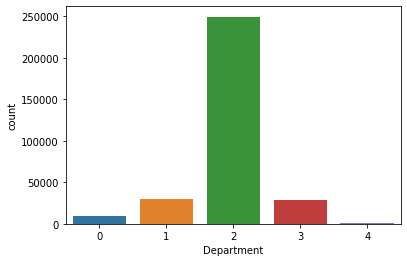

In [30]:
sns.countplot('Department',data=train_df)


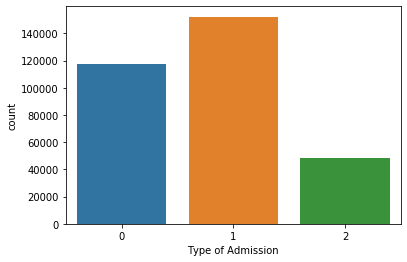

In [31]:
sns.countplot('Type of Admission',data=train_df)

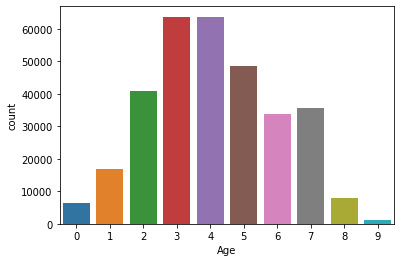

In [32]:
sns.countplot('Age',data=train_df)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(train_df.drop('Stay',axis=1),train_df['Stay'] , test_size=0.2, random_state=0,shuffle=True)

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=10, random_state=6)
clf_rf.fit(X_train,y_train)
preds=clf_rf.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, preds)*100, '%')

Accuracy:  41.85560859188544 %


In [35]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
preds=clf_gnb.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, preds)*100, '%')

Accuracy:  35.92984549679689 %


In [36]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train,y_train)
preds=clf_xgb.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, preds)*100, '%')

Accuracy:  42.7914206757945 %


In [37]:
from lightgbm import LGBMClassifier
clf_lgb = LGBMClassifier(random_state=666,n_estimators=800,learning_rate=0.07,colsample_bytree=0.7,
                        min_data_in_leaf=55,reg_alpha=1.6,reg_lambda=1.1)
clf_lgb.fit(X_train,y_train)
preds=clf_lgb.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, preds)*100, '%')

Accuracy:  43.19966084662731 %


In [19]:
from catboost import Pool, CatBoostClassifier

clf_ctb = CatBoostClassifier(iterations=100,
                           learning_rate=0.08,
                           depth=7,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')
clf_ctb.fit(X_train,y_train)
preds=clf_ctb.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, preds)*100, '%')

In [38]:
df_sub = pd.DataFrame()
df_sub["case_id"] = test_ids
df_sub["Stay"] = le1.inverse_transform(clf_lgb.predict(test_df))
df_sub.head()

df_sub.to_csv("Submission_Final.csv",index=False)

In [39]:
df_sub.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
